Distance, assortativity and random walks

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

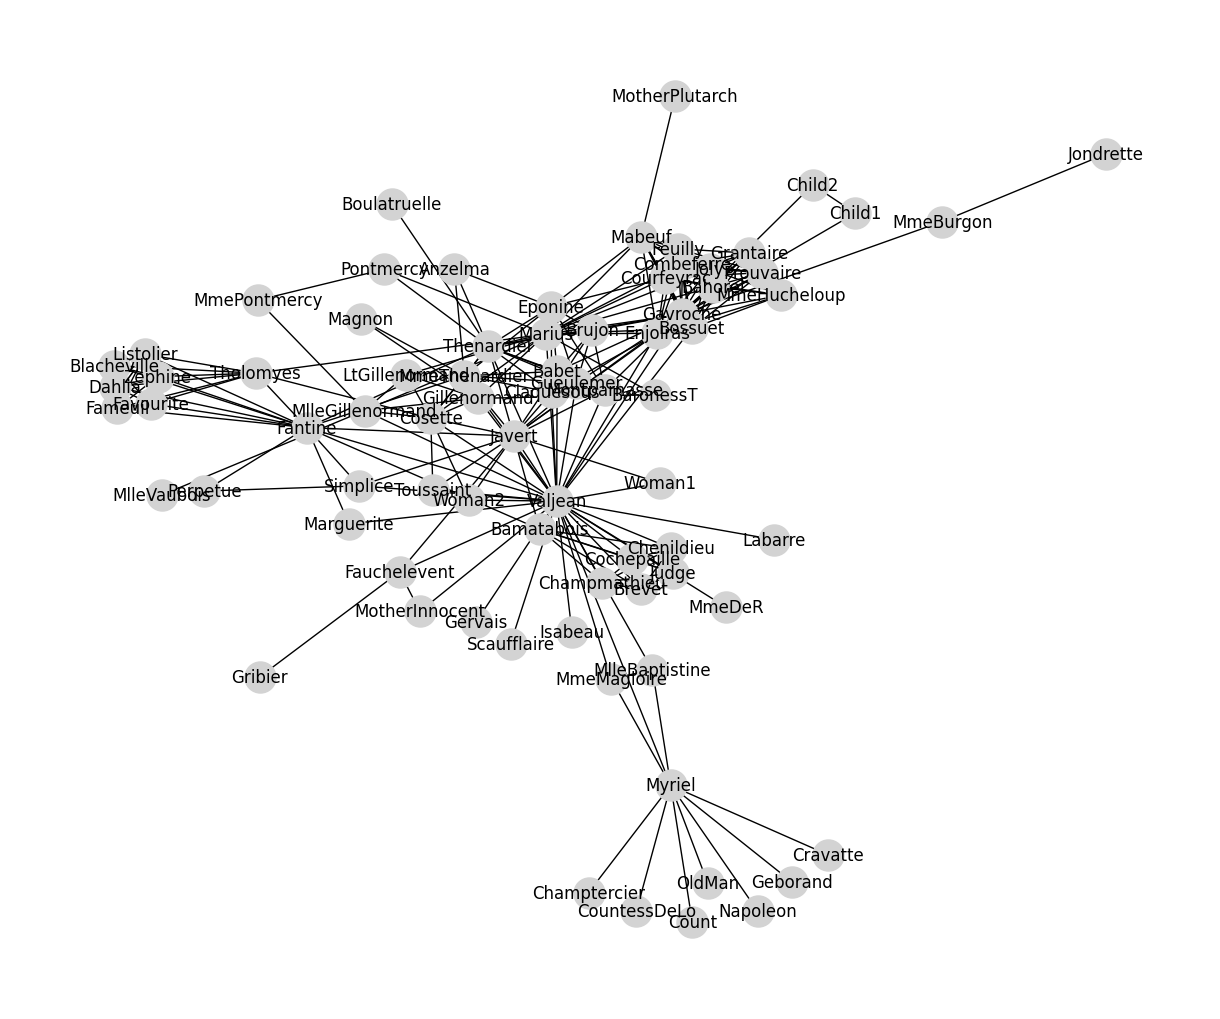

In [2]:
#G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
G= nx.read_gml("data/lesmis.gml") # Read the network
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [3]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [4]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [5]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [6]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


Distance

In [7]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", "%3.4f"%l)
else:
    print("The graph has more than one connected component")

Average shortest path length: 2.6411


In [8]:
d = nx.diameter(G)
print('Network diameter:', d)

Network diameter: 5


In [9]:
E = nx.global_efficiency(G)
print('Network efficiency', E)

Network efficiency 0.43528708133971317


In [10]:
leff = nx.local_efficiency(G)
print('The average local efficiency of the network:', leff)

The average local efficiency of the network: 0.620917974190862


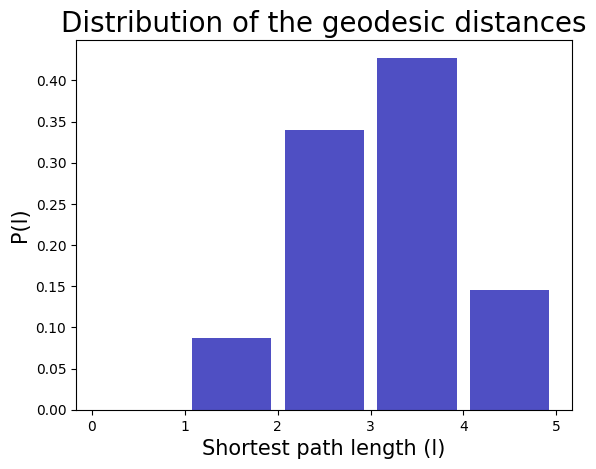

In [11]:
if nx.is_connected(G) == True:
    D = zeros(shape=(N,N)) # D is the matrix of distances
    vl = []
    for i in np.arange(0,N):
        for j in np.arange(i+1, N):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    x = range(0,d+1)
    plt.hist(vl, bins = x, density=True, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title("Distribution of the geodesic distances", fontsize=20)
    plt.ylabel("P(l)", fontsize=15)
    plt.xlabel("Shortest path length (l)", fontsize=15)
    #plt.grid(True)
    plt.savefig('av_short_path.svg')
    plt.show(True)
else:
    print("The graph has more than one connected component")

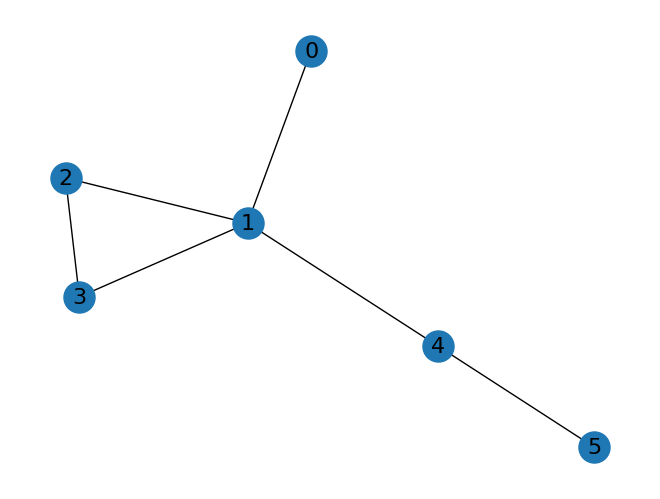

Distances:
 [[0. 1. 1. ... 3. 3. 3.]
 [1. 0. 2. ... 4. 4. 4.]
 [1. 2. 0. ... 3. 3. 3.]
 ...
 [3. 4. 3. ... 0. 2. 2.]
 [3. 4. 3. ... 2. 0. 2.]
 [3. 4. 3. ... 2. 2. 0.]]
Average shortest path length: 1.8000


In [12]:
def distance(G):
    D = zeros(shape=(N,N)) # D is the matrix of distances
    vl = []
    for i in np.arange(0,N):
        for j in np.arange(i+1, N):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
    return D
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1), (4,5)]
G = nx.Graph(edgelist)
N = len(G)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)
print('Distances:\n', D)
l = nx.average_shortest_path_length(G)
print("Average shortest path length:", "%3.4f"%l)

In [13]:
E = nx.global_efficiency(G)
print('Network efficiency', E)

Network efficiency 0.6666666666666665


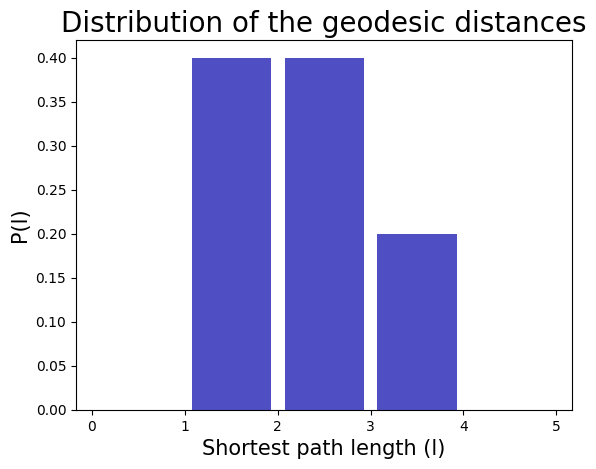

In [14]:
if nx.is_connected(G) == True:
    D = zeros(shape=(N,N)) # D is the matrix of distances
    vl = []
    for i in np.arange(0,N):
        for j in np.arange(i+1, N):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    x = range(0,d+1)
    plt.hist(vl, bins = x, density=True, color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title("Distribution of the geodesic distances", fontsize=20)
    plt.ylabel("P(l)", fontsize=15)
    plt.xlabel("Shortest path length (l)", fontsize=15)
    #plt.grid(True)
    plt.savefig('av_short_path.svg')
    plt.show(True)
else:
    print("The graph has more than one connected component")

Degree-degree correlations

In [15]:
G = nx.read_gml("data/lesmis.gml") # Read the network
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [16]:
r=nx.degree_assortativity_coefficient(G)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.1652


In [17]:
ki = []
kj = []
for i in range(0,len(G.nodes())):
    for j in range(0, len(G.nodes())):
        if(G.has_edge(i,j) == True):
            ki.append(G.degree(i))
            kj.append(G.degree(j))
            
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(ki, kj)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.165


In [18]:
knn = []
for i in G.nodes():
    aux =  nx.average_neighbor_degree(G, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 13.65


In [19]:
vk = dict(G.degree())
vk = list(vk.values())
#print(vk)

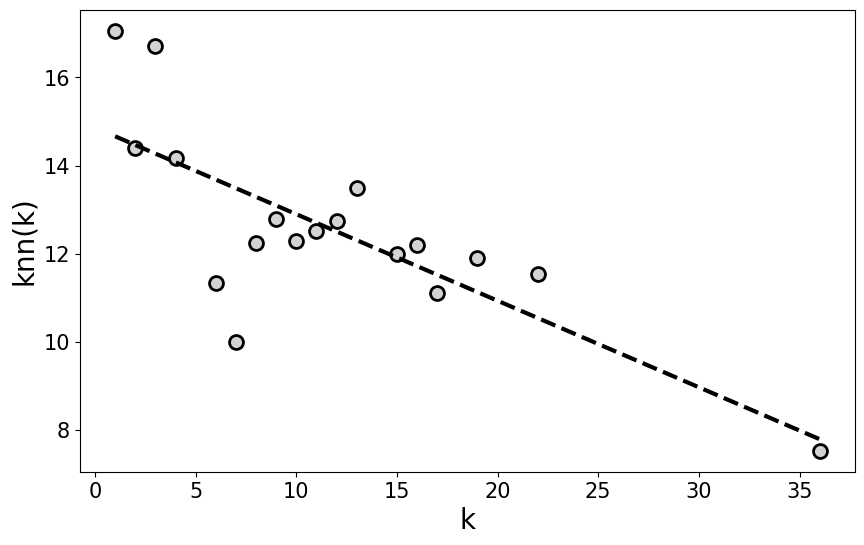

In [20]:
knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
fig= plt.figure(figsize=(10,6))

plt.plot(ks, knnk, '-o', color='gray',markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)", fontsize = 20)
plt.xlabel("k", fontsize = 20)
#plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

In [21]:
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

Pearson correlation coefficient: -0.7608494532332195


In [22]:
from scipy import stats
s = stats.spearmanr(ks, knnk)
print('Spearman rank correlation coefficient:', s)

Spearman rank correlation coefficient: SignificanceResult(statistic=-0.6553147574819401, pvalue=0.0031558468964774365)


Random walks

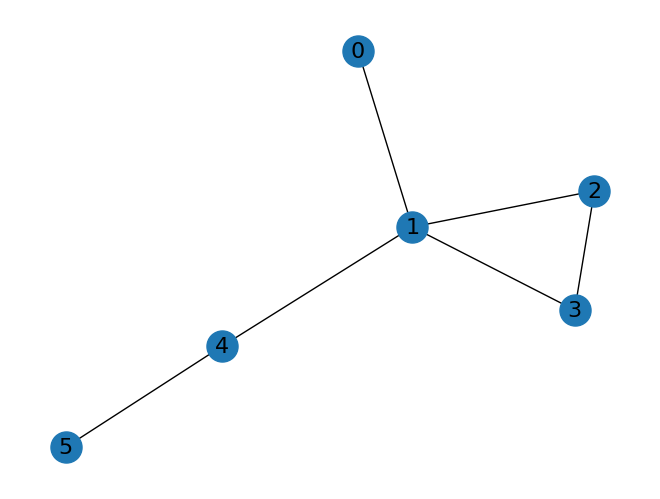

Walk: [1, 3, 1, 4, 5, 4, 1, 0, 1, 3]


In [23]:
import random as random

edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1), (4,5)]
G = nx.Graph(edgelist)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

# random walk of length T
T = 10
seed_node = 0
# neighbors
ng = G.neighbors(seed_node)
walk = []
for t in range(0,T):
    next_node = random.choice(list(ng))
    ng = G.neighbors(next_node)
    walk.append(next_node)
print('Walk:', walk)

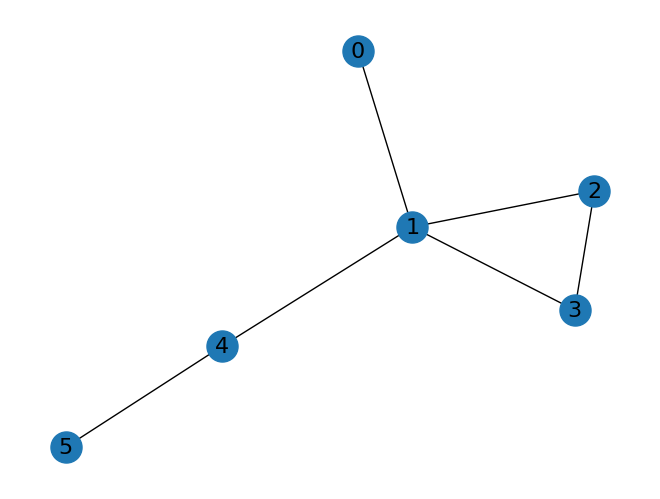

[[0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]
Number of walks of length two:
[[1. 0. 1. 1. 1. 0.]
 [0. 4. 1. 1. 0. 1.]
 [1. 1. 2. 1. 1. 0.]
 [1. 1. 1. 2. 1. 0.]
 [1. 0. 1. 1. 2. 0.]
 [0. 1. 0. 0. 0. 1.]]


In [24]:
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

A = nx.to_numpy_array(G)
print(A)
print('Number of walks of length two:')
print(A@A)

In [25]:
print('Number of walks of length two:')
print(A@A@A)

Number of walks of length two:
[[0. 4. 1. 1. 0. 1.]
 [4. 2. 5. 5. 5. 0.]
 [1. 5. 2. 3. 1. 1.]
 [1. 5. 3. 2. 1. 1.]
 [0. 5. 1. 1. 0. 2.]
 [1. 0. 1. 1. 2. 0.]]
